# Prueba con un cpatcha particular

Importacion de librerias

In [57]:
# aceleracion de hardware en GPUs AMD
# import plaidml.keras
# plaidml.keras.install_backend()

import numpy as np
import argparse
import imutils
import os
import cv2
import sys
import string

from os import listdir
from os.path import splitext
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from difflib import SequenceMatcher
import random
import string

import matplotlib.pyplot as plt

Intrucciones para el reconocimiento de imagen

Cargando modelo...
Cargando dataset...
variable name S58K
variable labels ['S', '5', '8', 'K']
Efectuando test...
Test terminado



Las etiquetas que contiene son:  ['S', '5', '8', 'K']
Las la respuesta correcta es:  S58K


Las etiquetas predichas son:  ['S', '5', '8', 'K']
La palabra parcialmente correcta es:  S58K
Aciertos: 4/4


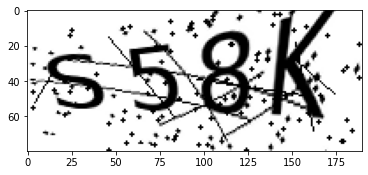

In [76]:
#declaracion alfabeto
alphabet = string.digits + string.ascii_letters
#Declaracion del alfabeto reconozible por el programa
recognizer_alphabet = ''.join(sorted(set(alphabet.upper())))

def decode(array):
    index = np.argmax(array)
    return recognizer_alphabet[index]

def load_dataset(index):
    # Ruta de los datos
    
    path = "../dataset/data_valid/"
    list_chars = os.listdir(path)
    seg_path = path + list_chars[index] + "/clasification/" 
    img_path = path + list_chars[index] + "/"
    list_char = os.listdir(seg_path)
    
    data = []
    labels = []
    
    for char in list_char:
        #print(f"Cargando datos del caracter '{char}'")

        #actualizacion de rutas
        path = seg_path + char + "/"
        files = os.listdir(path)

        for file in files:
            #obtencion de la imagen y reescalado
            image = cv2.imread(path + file)
            resized = cv2.resize(image, (30, 30))

            #etiqueta one-hot
            label = char.split('_')[1]
            
            #guardando datos
            data.append(resized)
            labels.append(label)
    name = list_chars[index]
    image = cv2.imread(img_path + "x_" + list_chars[index]  + ".png")
    return name, image, data, labels

if __name__ == "__main__":
    print("Cargando modelo...")
    model = load_model('../models/model-md[1e-06]-pt[10]/model.hdf5')
    
    #El indice determina que captcha de la ruta data_valid sera usado
    index = random.randint(0,99)
    
    print("Cargando dataset...")
    name, image, data, labels = load_dataset(index)
    print(f"variable name {name}")
    print(f"variable labels {labels}")
    y_pred = []
    y_true = []

    right = 0
    total = 0
    print("Efectuando test...")
    for i in range(len(data)):
        sample = data[i]
        label = labels[i]

        sample = sample.astype("float32") / 255.0
        sample = np.expand_dims(sample, axis=0)

        #prediccion y decodificacion del resultado
        out = model.predict(sample)
        decoded = decode(out)
        if label == decoded:
            right += 1
        total += 1

        y_true.append(label)
        y_pred.append(decoded)
        
    print("Test terminado\n\n\n")

    palabra=""
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            palabra=palabra+y_pred[i]
        else:
            palabra=palabra+'_'
    print("Las etiquetas que contiene son: ", y_true)
    print("Las la respuesta correcta es: ",name)
    print("\n\nLas etiquetas predichas son: ", y_pred)
    print("La palabra parcialmente correcta es: ", palabra)
    print(f"Aciertos: {right}/{total}")
    plt.imshow(image)